<a href="https://colab.research.google.com/github/luciabarg/mentoria_img/blob/master/An%C3%A1lisis_y_visualizaci%C3%B3n_1era_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de una de las carpetas de las imágenes del [Github](https://github.com/diegobcuadro/dataset_ManosyGuantes) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Si siguieron los primeros pasos de [PreAnálisis_y_visualización-Notebook_0.ipynb](https://colab.research.google.com/drive/1_SBcDDlXT7SX9De_ucBmKgsx6SUg9jKX?usp=sharing) pueden ir directo a <a href="#exploratory_data_analysis"> Análisis Exploratorio</a>.

Si quieren repasar, continuen, no es tan largo de todas formas. 

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [PreAnálisis_y_visualización-Notebook_0.ipynb](https://colab.research.google.com/drive/1_SBcDDlXT7SX9De_ucBmKgsx6SUg9jKX?usp=sharing)

pueden acceder desde el siguiente [link](https://drive.google.com/file/d/1XrG93Pxt-TTD_avUGy6nFXbHqyBh9tga/view?usp=sharing) a la tabla de features a analizar en esta notebook. Si utilizan la [carpeta compartida del Drive](https://drive.google.com/drive/folders/1Yr1ymy7t3u9YbDyOtFq_LR7WpIfvCyLU?usp=sharing), no es necesario descargarla.





**Imágenes: Conceptos Básicos**

*Basado en el [Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python](https://github.com/vrulloni/MLIP)*



Podemos definir una imagen como una función o arreglo bidimensional f(x1,x2) donde x=(x1,x2) son las coordenadas espaciales, y el valor de f en cualquier x es la intensidad de la imagen en dicho punto, si es en grises o binaria.

Si es en color hay 3 valores de intensidad, uno por cada canal: R, G y B (red, green, blue).

Si es imagen satelital hay tantos valores como bandas o canales tenga la imagen (depende de la cantidad de sensores).

El tamaño de la imagen monocroma (en grises) es el número de filas por el número de columnas, M×N. Cada punto corresponde a un píxel. Si es a color: M×Nx3. Si es salelital: M×Nxk donde k es la cantidad de bandas (espectrales).


*Resolución de la imagen:* dada por la cantidad de píxeles

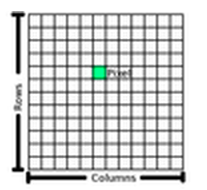

In [0]:
Imge('raster_dataset.png')

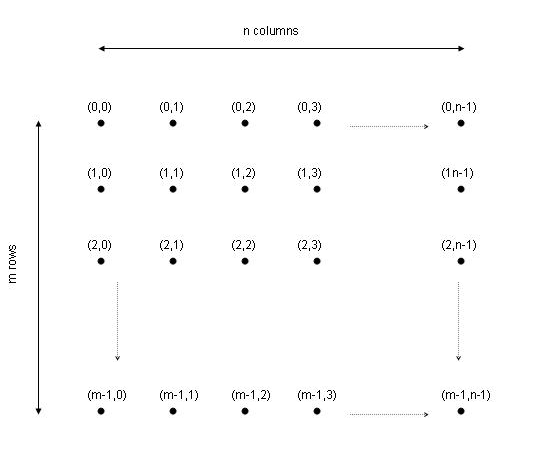

In [0]:
Imge('coordnadas.jpg')

La indexación de la imagen en Python sigue la convención habitual, comenzando en 0.

En el caso de imágenes en gris, al pixel le corresponde un número que es el valor de intensidad I(x,y).
En el caso de imágenes en color el tamaño del array será MxNx3. almacenando así en cada posición la intensidad de cada canal R, G y B. R será (x,y,1), G (x,y,2) y, por último, B (x,y,3). 

Si la intensidad se almacena como entero sin signo de 8 bits (uint8), su valor pertenece al intervalo [0 255].
        0 corresponde al negro                   255 corresponde al blanco.

Si la intensidad se almacena como entero de 16 bits (uint16) significa que pertenece al intervalo [0 65535], ya que corresponde a un entero sin signo de 16 bits.

Si la imagen es binaria, la intensidad toma solo los valores 0 o 1.

La coordenada (0,0) corresponde a la esquina superior izquierda de la imagen.
La coordenada (M-1, N-1) a la esquina inferior derecha.

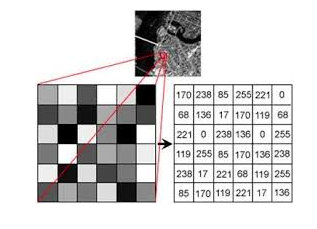

In [0]:
Imge('explicaimagen.jpg')

Hay dos formas de ejecutar lo siguiente, pueden hacerlo en su compu personal o en el Colab.

#### **Computadora personal**: 
Clonar el [repositorio](https://github.com/diegobcuadro/dataset_ManosyGuantes) donde están las imágenes y luego moverse entre las carpetas. 

Yo utilizo Ubuntu, voy a usar comandos de copiar y mover carpetas de ese sistema operativo, sinceramente no sé si funciona lo siguiente que les comento en Windows (quizás puedan usar Docker? -> Google nuestro bien amigo)



##### *Creación del entorno:*

Vamos a tener que instalar varias librerías. Para no comprometer los programas del sistema, sugiero que creen un entorno: 

In [0]:
#https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

Desde la terminal: 

*$ conda create --name mentoria_img*

*$ conda activate mentoria_img*

pasará de *(base) -> (mentoria_img)*

Ahora si, podemos instalar las librerías necesarias, por única vez. 

Se puede hacerlo de consola con 

*$ pip install <paquete>*



o desde esta misma notebook como 

*! pip install <paquete>*

##### **Google Colab:** 

Antes de vincular su Drive con el Colab, tienen que tener el 'path' a la carpeta donde están los archivos. Acá está el [link](https://drive.google.com/drive/folders/1h1hHcEqzdruIsngERX8wdFjB2sM0S_aw?usp=sharing), es carpeta compartida: 



Para conectar con el Drive, corran la siguiente celda y hagan click en el enlace azul. En la nueva ventana, seleccionan su cuenta de Gmail, van hasta el final de los permisos y pongan 'Permitir'.
Aparece un link negro y copien el enlace que les salta, vuelvan a la notebook y lo copian en el recuadro en blanco que aparece.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para chequear donde están los archivos que quieren, en las pestaña del costado, hay tres íconos. Uno que tiene 3 líneas, otro que tiene '< >' y otro que tiene una carpeta. Hagan click en la carpeta y esperen un ratito (rato, depende...) que se cargue todo.

Una vez que se carga, aparecen 2 carpetas: 'drive' y 'sample_data'. Hagan click en el triangulito de 'drive'. Va a aparece 'My Drive' y todas tus carpetas del Drive. Buscá tu carpeta (hasta donde esté el dataset que necesitás) y colocando arriba el cursor, hagan click derecho y seleccionen 'Copiar la ruta de acceso'. Y esa es la que copian en 'os.chdir'. 

In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
import os
os.chdir('/content/drive/My Drive/Mentoria')


#### A partir de aquí, es independiente si están en su computadora o en el Colab. Lo que si... si están en su compu, tengan espacio disponible, porque vamos a cortar de las imágenes, las porciones de las manos y las guardaremos en archivos '.jpg'. Y son bastantes...
(yo lo corrí con este Colab)

In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
import os
os.chdir('/content/drive/My Drive/Mentoria')

<a name="exploratory_data_analysis"></a>
#### **Análisis Exploratorio y visualización**

*FECHA LíMITE DE ENTREGA: 29/06*

Pueden conectar su Colab o correr la notebook en su computadora. Yo lo corrí con este Colab. 

In [0]:
#Acá vinculamos el Colab con nuestro Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
import os
os.chdir('/content/drive/My Drive/Mentoria')

In [0]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path

from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tenemos 3 conjuntos de datos, Mañana, Tarde y Noche:

In [0]:
#para poder instalar paquetes por ej o listar las carpetas como en este ejemplo, hay que anteponer el símbolo de exclamación:
!ls

Dataset-M  Dataset-N  Dataset-T


Cada una de ellas, tiene otras carpetas 'G' y 'P':

In [0]:
! ls Dataset-M

G  P


y dentro de estas, dos carpetas, *'train'* y *'test'*, con su correspondiente archivo 'csv' de 'etiquetas'. 

In [0]:
! ls Dataset-M/G

M-G-Labels_test.csv  M-G-Labels_train.csv  test  train


A partir de dichos 'csv', extrajimos algunas características de interés (recordar que son varias carpetas, 12 en total, por lo que serán 12 csv).
Podríamos analizar todas las carpetas, pero sugiero para esta primera aproximación y análisis de datos, utilizar sólo una de las carpetas principales (o sea, *'M'*,*'N'* o *'T'*), e incluso, tomar sólo una de las subcarpetas (*'G'* o *'P'*) y de éstas, solo *'test'* o *'train'*. 

Una vez que todo este proceso fue analizado y entendido, lo extenderemos a las demás carpetas para tener una mayor cantidad de datos. 


Entonces, para arrancar, utilizaremos la carpeta *'train'* del conjunto *'G'* del *'Dataset-M'*.



In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G/train')
#! ls #son muchas!

*Visualización con OpenCv*

In [0]:
#son muchas! elegimos cuaquiera para visualizar:
picture =  'M_G_Trabajando_Amarillos_16.jpg'
img=cv2.imread(picture)

In [0]:
print("El tipo de la primer imagen es ",type(img))
print("El tipo de cada píxel es ",type(img[0,0,0]))
print("La dimensión de la imagen es ",img.shape)

##A partir de shape podemos tomar variables con nombres más significativos
altura=img.shape[0]
ancho=img.shape[1]
canales=img.shape[2]
print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (1080, 1920, 3)
La altura es 1080 .El ancho es  1920 .Los canales de color son  3


**OJO!!!! En Jupiter Notebook:**
Para visualizar la imagen, se correr la siguiente celda, hacer click en la ventana emergente para visualizar la imagen. **Para cerrar la imágen, NO HAGAN CLICK EN LA CRUZ!!**, utilizen cualquier tecla del teclado (por ej. 'Esc').
Si lo cierran con la cruz, no dejan que OpenCV cierre la imagen por uds
y Jupyter se queda colgado, por lo que hay que resetear el kernel.

In [0]:
# Descomentar si lo corren en su computadora:

#imagen = cv2.resize(img, (int(altura/2), int(ancho/6))) #se hizo resize para mejor visualización! 
#cv2.imshow('imagen', imagen); cv2.waitKey(0); cv2.destroyAllWindows()

En **Colab** no sucede eso, solo se abre a continuación.

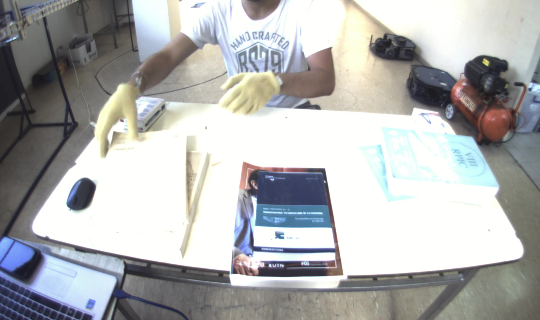

In [0]:
imagen = cv2.resize(img, (int(altura/2), int(ancho/6))) #se hizo resize para mejor visualización! 
cv2_imshow(imagen) #en Colab

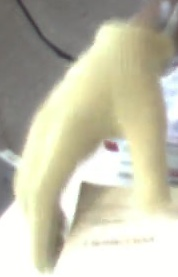

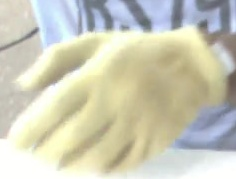

In [0]:
#Visualizamos los recortes de la mano:
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes/guantes_amarillos_train_MG')
#Cargo imagen y calculo histograma
img_g1 =cv2.imread('M_G_Trabajando_Amarillos_16_double_box1.jpg')
img_g2 =cv2.imread('M_G_Trabajando_Amarillos_16_double_box2.jpg')

cv2_imshow(img_g1)
cv2_imshow(img_g2)

En la notebook anterior, generamos una tabla de features para cada. Pueden acceder a ella desde el siguiente [link](https://drive.google.com/file/d/1XrG93Pxt-TTD_avUGy6nFXbHqyBh9tga/view?usp=sharing)

Si están en Colab, busquen en la carpeta compartida 'dataset':

In [0]:
#cambien por el path que los lleve a la misma carpeta
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G/train/dataset/')
!ls

csv_wlabels_train_MG_df.csv  features.py


In [0]:
# Abrimos el archivo y lo chusmeamos:
dataset_train_MG_ = pd.read_csv('csv_wlabels_train_MG_df.csv', low_memory=False) #porqué low? no hay por qué. Sino no reconoce algunos tipos de columnas sino
dataset_train_MG = dataset_train_MG_.drop(['Unnamed: 0'], axis=1) 
dataset_train_MG.head(5)

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Mano-Amarillo_0_double_box2.jpg,436,662,273,474,M,G,si,amarillo,1.192934,0.132554,0.292861,0.704324,0.043486,0.561370,0.492875,0.415565,0.606461,0.405709,0.532783,0.382000,0.859358,0.157759,0.539070,0.180152,0.087641,0.451658,0.067623,0.188491,0.273504,0.352612,0.365537,0.085581,0.049281,0.534786,0.346597,0.729510,0.327267,0.175310,0.214354,...,0.109618,0.201162,0.053464,0.400421,1.828703,0.766772,0.345443,0.320869,0.876834,1.105888,0.360420,0.137844,0.201754,0.184912,1.058968,0.694844,0.348436,0.221967,1.842808,0.593052,0.208990,0.419584,0.467739,0.847367,0.767512,0.429070,0.462808,0.097680,0.373019,0.055480,0.850606,0.618605,0.579222,0.214956,1.543457,0.240321,0.015946,0.498210,0.105096,0.415124
1,M_G_Mostrando_Mano-Amarillo_10_double_box2.jpg,307,503,227,357,M,G,si,amarillo,0.473153,0.326438,0.872934,0.272843,0.581942,0.085599,0.116944,1.393549,0.868530,0.557496,0.077261,0.120294,0.248606,0.222858,0.037286,0.110815,0.024490,0.304910,0.080512,0.987467,0.256264,0.208748,0.706314,0.027361,0.048373,0.121103,0.151871,0.414459,0.020769,0.036364,0.139919,...,0.114571,0.486142,0.007770,0.081066,0.650191,1.732524,0.107846,0.190294,0.139264,0.262592,0.818040,0.411074,0.561725,0.178695,1.652464,0.323930,0.114231,0.034584,0.112140,0.549182,0.521623,0.479088,0.086294,0.663143,0.556707,0.101734,0.252282,0.200444,0.193105,0.226180,0.327536,0.041440,0.610802,0.714450,1.010661,0.164083,0.489083,0.401081,0.334849,0.009120
2,M_G_Mostrando_Mano-Amarillo_11_double_box2.jpg,304,503,162,351,M,G,si,amarillo,0.551692,0.311296,0.630988,0.612515,0.324043,0.122678,0.292788,1.080067,0.315567,0.291490,0.299222,0.343937,0.387980,0.095756,0.041759,0.252472,0.021887,0.390645,0.009959,0.159158,0.046286,0.517520,0.329951,0.015500,0.208366,0.207085,0.477750,1.682721,0.211059,0.136033,0.004871,...,0.202850,0.283488,0.004961,0.331641,1.339007,1.408519,0.366572,0.162958,0.096853,0.572625,0.727882,0.139311,0.394578,0.234353,1.004670,0.320588,0.795888,0.018158,0.721928,0.496969,0.381788,0.381119,0.520868,0.709025,0.796566,0.022527,0.436449,0.095957,0.142214,0.054401,0.399043,0.194232,0.255874,0.506477,1.049478,0.093706,0.237381,0.270804,0.206780,0.021252
3,M_G_Mostrando_Mano-Amarillo_12_double_box2.jpg,320,516,102,308,M,G,si,amarillo,0.445529,1.104021,0.329798,0.772140,0.191984,0.092597,0.323702,0.493198,0.260759,0.254920,0.351949,0.659263,0.447098,0.195273,0.218607,0.268113,0.177694,0.234917,0.034185,1.457397,0.243114,0.227982,0.109678,0.034942,0.022739,0.370361,0.388175,1.431276,0.508981,0.182964,0.028220,...,0.342891,0.395380,0.000000,1.146170,2.406389,1.542115,0.599406,0.682540,0.349439,0.375349,0.910304,0.101252,0.310441,0.259261,0.752298,0.508452,1.337586,0.117757,0.462209,0.567773,0.316124,0.120465,0.518646,0.852264,0.879169,0.088652,0.956650,0.038115,0.170151,0.015820,0.151291,0.084338,0.546983,0.239140,0.521701,0.121823,0.056032,0.503652,0.516597,0.325798
4,M_G_Mostrando_Mano-Amarillo_13_double_box2.jpg,323,507,76,291,M,G,si,amarillo,0.401482,1.118310,0.485366,0.686955,0.046806,0.203579,0.343371,0.685662,0.365654,0.238447,0.164747,0.638464,0.357792,0.310761,0.130233,0.190511,0.145574,0.047850,0.008097,0.955863,0.202188,0.456735,0.175217,0.003151,0.091389,0.384982,0.245546,1.183161,0.610042,0.135109,0.068913,...,0.183034,0.248365,0.004623,1.021811,1.633345,1.578439,0.513223,0.543867,0.239947,0.230462,0.854492,0.106203,0.446704,0.263999,0.866798,0.268687,1.261234,0.019139,0.585002,0.505261,0.361614,0.125756,0.382490,1.262282,0.557245,0.088643,1.130196,0.005393,0.386618,0.028207,0.361752,0.200909,0.574926,0.532086,0.517593,0.025498,0.058469,0.502583,0.073139,0.072178


In [0]:
#descripción general de la tabla. Si quieren que aparezcan las categóricas tb, dentro del paréntesis pongan include='all'
dataset_train_MG.describe()

,xmin,xmax,ymin,ymax,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,771.657816,974.319138,258.218938,433.529058,0.477770,0.331842,0.445396,0.373106,0.219712,0.266277,0.432418,0.929838,0.555243,0.265715,0.323893,0.245734,0.473116,0.351616,0.216477,0.141867,0.208300,0.391411,0.406250,0.228911,0.188195,0.379157,0.539597,0.322744,0.241840,0.317191,0.278264,0.620548,0.213563,0.159680,0.193713,0.304085,0.242244,0.308130,0.313400,0.150645,...,0.395579,0.200528,0.075142,0.475661,1.288574,1.274743,0.167222,0.303251,0.430871,0.618949,0.389508,0.247155,0.190523,0.157521,0.733245,0.405542,0.502956,0.183366,0.899037,0.519834,0.175979,0.347612,0.241890,0.495322,0.757072,0.200101,0.433913,0.271685,0.409189,0.134600,0.539357,0.418268,0.352605,0.269870,0.869333,0.272479,0.221077,0.261720,0.217420,0.253174
std,322.755374,317.190835,114.742089,143.397632,0.367963,0.261997,0.347320,0.286808,0.198534,0.226057,0.315389,0.418831,0.365728,0.195801,0.250399,0.290876,0.352024,0.251262,0.174546,0.128747,0.216942,0.269424,0.370876,0.252726,0.171419,0.250389,0.442542,0.327718,0.269646,0.208702,0.239106,0.412825,0.175200,0.150416,0.172410,0.304076,0.176697,0.233776,0.206846,0.144169,...,0.311965,0.150707,0.088064,0.330557,0.749176,0.610341,0.152124,0.277516,0.291269,0.351078,0.302060,0.209879,0.148432,0.113736,0.576239,0.273691,0.373283,0.167314,0.499653,0.284278,0.166945,0.261882,0.184747,0.312581,0.340874,0.204811,0.418447,0.260211,0.228247,0.141702,0.327215,0.420016,0.312070,0.233409,0.450767,0.212012,0.205468,0.188005,0.227270,0.183336
min,0.000000,307.000000,0.000000,128.000000,0.000390,0.000000,0.000000,0.000268,0.000000,0.000000,0.000000,0.065238,0.000000,0.000932,0.000000,0.000000,0.000000,0.001869,0.000000,0.000000,0.000000,0.002415,0.001510,0.000000,0.000000,0.001431,0.003762,0.000000,0.000000,0.000000,0.000000,0.000757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012937,0.098471,0.000000,0.000000,0.003355,0.000412,0.000635,0.000000,0.000000,0.000000,0.000076,0.000000,0.000644,0.000000,0.030766,0.025648,0.000000,0.000088,0.000000,0.003396,0.042753,0.000000,0.000000,0.000000,0.008218,0.000000,0.003120,0.000000,0.000000,0.000000,0.028360,0.000000,0.000000,0.000000,0.000000,0.000000
25%,553.000000,747.750000,176.750000,322.750000,0.205745,0.136916,0.195043,0.165223,0.073274,0.099189,0.195196,0.601902,0.283189,0.121615,0.142872,0.069243,0.221102,0.171811,0.083302,0.046032,0.055697,0.187238,0.132023,0.063270,0.060963,0.197824,0.206759,0.094862,0.052130,0.163287,0.109996,0.322128,0.082701,0.051307,0.067601,0.097395,0.108273,0.145583,0.161522,0.048113,...,0.170465,0.088007,0.014220,0.236299,0.675619,0.805388,0.061588,0.110731,0.219984,0.356615,0.162219,0.093307,0.080304,0.069624,

#### *Análisis General de la tabla*

Aprovechen para describir la base de datos, incluyan también el conocimiento que tienen de las carpetas y los demás conjuntos de datos

* ¿Cuántas entradas posee el dataset?
* ¿Cuántas clases distintas de imágenes tenemos? Nombres y cantidad de datos
* ¿Podemos hacer una generalización mas amplia? Nombres y cantidad de datos
* ¿Hay valores nulos?

La extracción de features fue realizada con el script 'features.py', también presente en la carpeta 'dataset', con una red ResNet101 usando pytorch. Una explicación mas o menos similar a lo realizado pueden encontrarla este [link](https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c). 

### *Análisis Estadístico*

Si bien son muchas columnas, podemos ir viéndolas de a poco. 

¿Habrá algunas mas importantes que otras? Analizen las distribuciones. 

Luego del análisis, evalúen la correlación entre las mismas.

Si se les ocurre alguna selección de features mas importantes con otras herramientas que no vieron en la materia de 'Análisis y visualización de datos', genial. Igual es una propuesta nomás, no se enloquezcan tampoco. 


Sólo para orientarlos un poco:

In [0]:
#definimos algunos filtros
si_gt = dataset_train_MG["guantes"] == "si"
no_gt = dataset_train_MG["guantes"] == "no"

print('cantidad de imágenes de la base según si tienen o no guantes' + str('\n')+
      ' guantes si '+ str(si_gt.sum()) + str('\n') +
      ' guantes no '+ str(no_gt.sum()) + str('\n') ) 

cantidad de imágenes de la base según si tienen o no guantes
 guantes si 1275
 guantes no 721



Están bien las etiquetas? Falta algún dato? 
Con un gráfico pueden visualizar la cantidad de datos en cada categoria (hint: countplot)

In [0]:
#Seleccionamos 10 columnas: 
list_columns = list(dataset_train_MG.columns) 
list1 = list_columns[9:20]  

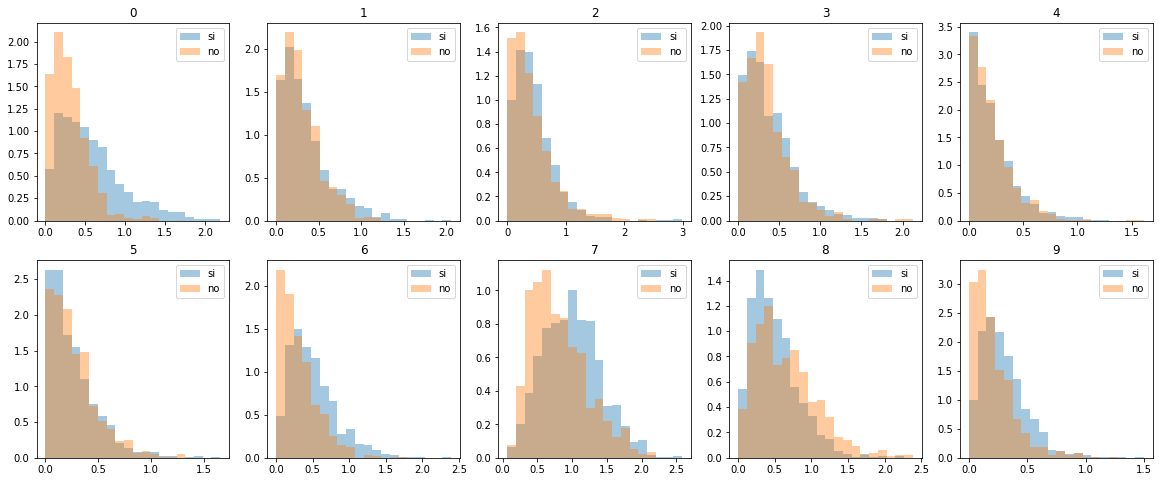

In [0]:
#histogramas:
ntot = 10
ny = 5
nx = 2#int(ntot/ny) + 1

gt_label = [si_gt,no_gt]
Names = ["si","no"]

f, axes = plt.subplots(nx,ny,figsize=(20,8))

for ax,feature in zip(axes.flat[:ntot], list1):
    _min = dataset_train_MG[feature].min()
    _max = dataset_train_MG[feature].max()

    for label,name in zip(gt_label,Names):
        #sns.distplot(dataset_train_MG[feature][label],bins=20,ax=ax,hist=False,rug=True,kde_kws={"lw": 1,"label":name})
        ax.hist(dataset_train_MG[feature][label],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_xlabel("")
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

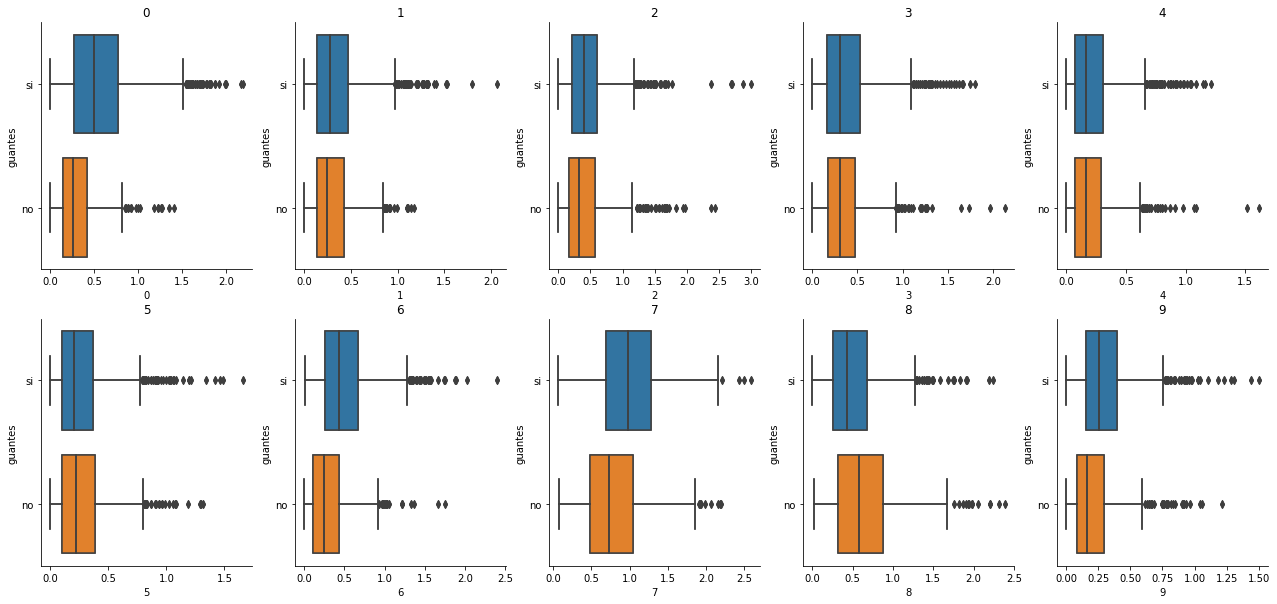

In [0]:
#boxplots
ntot = 10
ny = 5
nx = 2#int(ntot/ny) + 1

gt_label = [si_gt,no_gt]
Names = ["guante","mano"]

f, axes = plt.subplots(nx,ny,figsize=(22,10))

for ax,feature in zip(axes.flat[:ntot], list1):
    _min = dataset_train_MG[feature].min()
    _max = dataset_train_MG[feature].max()

    for view, name in zip(gt_label,Names):
        sns.boxplot(x=feature,data=dataset_train_MG,y="guantes", order=['si','no'],ax=ax)
    ax.set_title(feature)

       
for ax in axes.flat[ntot:]:
    ax.axis("off")
sns.despine()

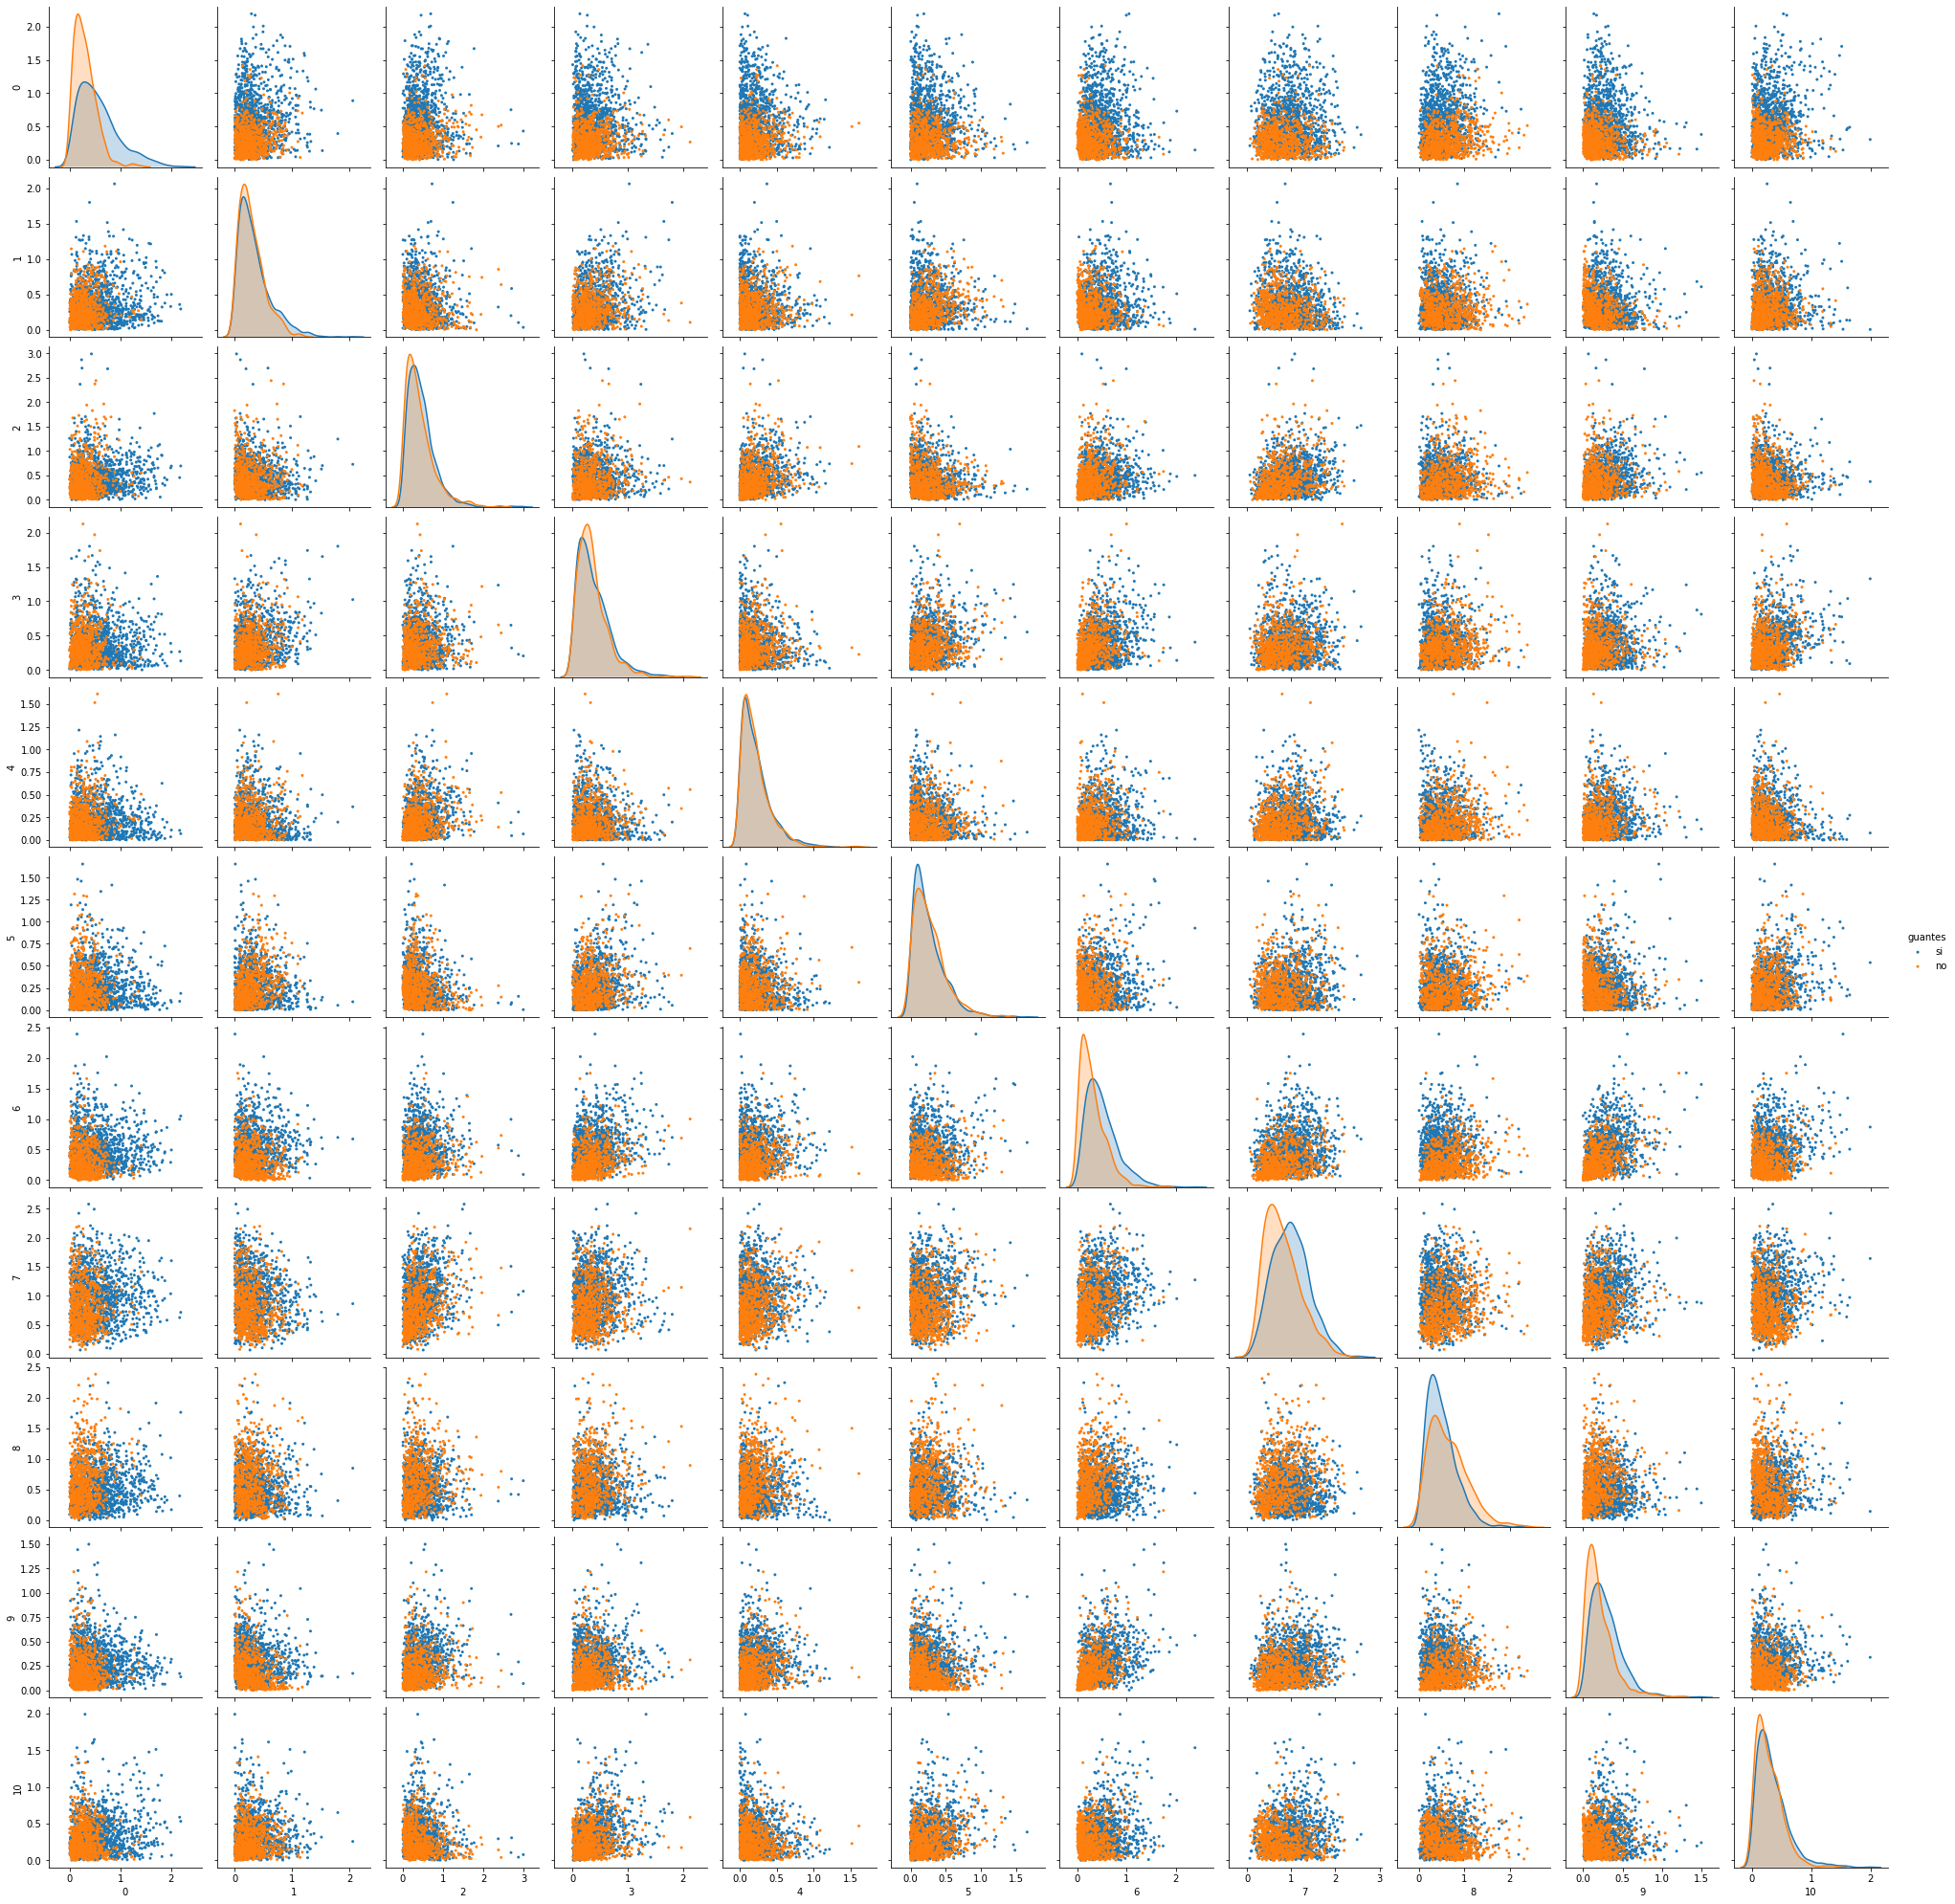

In [0]:
pairplot1 = list1
pairplot1.append('guantes')
sns.pairplot(dataset_train_MG[pairplot1],hue='guantes',hue_order=['si', 'no'],markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()


##### *Histogramas*

Además de la tabla, podemos visualizar los histogramas de las imágenes. 

El Histograma de una imagen es la gráfica que muestra la cantidad de píxeles que tienen una misma intensidad luminosa, para todas las intensidades.
Muestra gráficamente el vector de frecuencias de las intensidades presentes en la imagen.

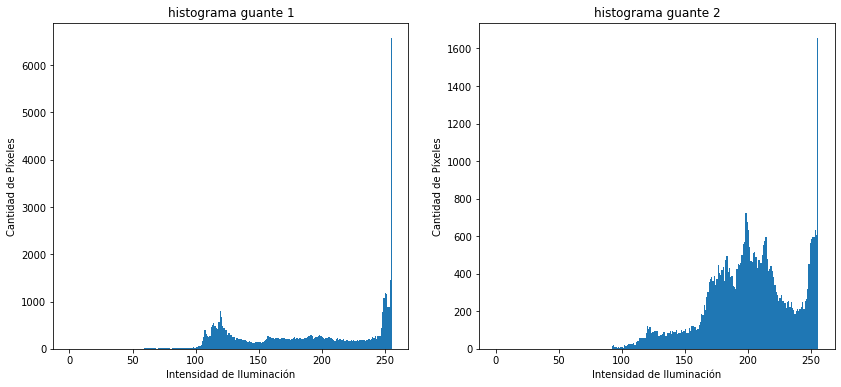

In [0]:
# OJO QUE VOLVEMOS A LA CARPETA DONDE ESTÁN LAS IMÁGENES CORTADAS:
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes/guantes_amarillos_train_MG')
#Cargo imagen y calculo histograma
img_g1_gris=cv2.imread('M_G_Trabajando_Amarillos_16_double_box1.jpg', 0)
img_g2_gris=cv2.imread('M_G_Trabajando_Amarillos_16_double_box2.jpg', 0)
#El 0 indica que devuelve imagen en gris directamente
#numpy tiene una función para calcular el histograma, pero no es rápida

#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) #Devuelve un vector

#El nombre de la imagen debe estar entre corchetes
#Channels indica para qué canal se pide el histograma. Puede ser 0, 1 o 2. 
#Si la imagen es gris se pone 0.
#Si el histograma es de la imagen completa se coloca como máscara None. 
#Se puede pedir el histograma de una parte de la imagen, mediante una máscara. 
#histsize indica la cantidad de bins. Si queremos contabilizar la frecuencia de todas las intensidades
#y tenemos 256 valores, colocamos 256 entre corchetes. Podemos agruparlos. Pedir por ejemplo 16 bins.
#ranges es el rango. En nuestro caso, normalmente es [0,256]
#Así hist será un array de 256x1

# Create two subplots 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.hist(img_g1_gris.ravel(),256,[0,256]),
ax1.set_title('histograma guante 1')
ax1.set_xlabel("Intensidad de Iluminación")
ax1.set_ylabel("Cantidad de Píxeles")

ax2.hist(img_g2_gris.ravel(),256,[0,256])
ax2.set_title('histograma guante 2')
ax2.set_xlabel("Intensidad de Iluminación")
ax2.set_ylabel("Cantidad de Píxeles")

plt.show()

#con OpenCV
#hist_1 = cv2.calcHist([img_g1],[0],None,[256],[0,256])
#hist_2 = cv2.calcHist([img_g2],[0],None,[256],[0,256])

# Create two subplots 
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

#ax1.hist(hist_1)
#ax1.set_title('histograma guante 1')
#ax1.set_xlabel("Intensidad de Iluminación")
#ax1.set_ylabel("Cantidad de Píxeles")

#ax2.plot(hist_2)
#ax2.set_title('histograma guante 2')
#ax2.set_xlabel("Intensidad de Iluminación")
#plt.show()

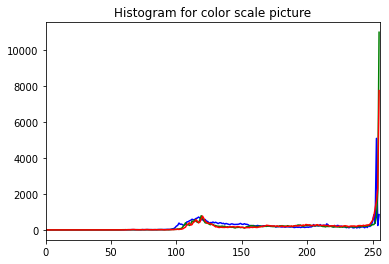

In [0]:
img=cv2.imread('M_G_Trabajando_Amarillos_16_double_box1.jpg')
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma de imagen a color')
plt.show()

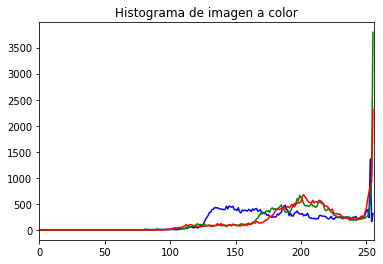

In [0]:
img=cv2.imread('M_G_Trabajando_Amarillos_16_double_box2.jpg')
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma de imagen a color')
plt.show()

In [0]:
#Para extraer los valores: 
y, x, _ = plt.hist(img_g1_gris.ravel(),256,[0,256])
print(x.max())
print(y.max())

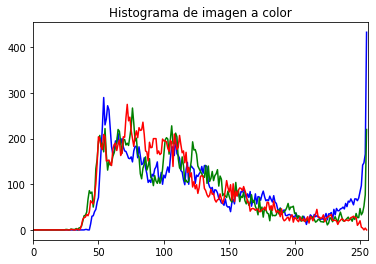

In [0]:
#Vemos otra de las imágenes, ahora de un guante verde
# OJO QUE VOLVIMOS A LA CARPETA DONDE ESTÁN LAS IMÁGENES CORTADAS:
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes/guantes_verdes_train_MG')
#!ls
img=cv2.imread('M_G_Trabajando_Verdes_58_double_box1.jpg')

color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma de imagen a color')
plt.show()

Si quieren aprender como lidiar con histogramas de imágenes, dense una vuelta por la notebook 'Ntb3_Histograma_Contraste_2019' del repositorio del [Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python](https://github.com/vrulloni/MLIP)